In [30]:
import matplotlib.pyplot as plt
import numpy as np

class TaskAccuracyPlotter:
    def __init__(self):
        self.fig1 = None
        self.fig2 = None
        self.fig3 = None
        self.label = None

    def plot_individual_task_accuracy(self, task_acc):
        """
        Plot the accuracy of each individual task.

        Args:
            task_acc (dict): A dictionary containing the accuracy of each task.
            label (str, optional): Label for the current plot.

        Returns:
            matplotlib.figure.Figure: The updated figure containing the plots.
        """
        if self.fig1 is None:
            num_tasks = len(task_acc)
            num_rows = (num_tasks + 1) // 2  # Number of rows in the subplots grid
            self.fig1, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
            axes = axes.flatten()
            plot_num = 0
        else:
            axes = self.fig1.get_axes()
            plot_num = 0

        for idx, (key, ax) in enumerate(zip(task_acc.keys(), axes[plot_num:])):
            if len(task_acc[key]) == 1:
                print(task_acc[key][0])
                task_acc[key] = [task_acc[key][0]]*len(task_acc.keys())
                print(task_acc[key])
            ax.plot(task_acc[key], label=self.label, marker='.')
            ax.grid(True)
            ax.set_xlabel('Task')
            ax.set_ylabel('Accuracy')
            ax.set_yticks(np.arange(0, 101, 5))
            ax.set_ylim(-1, 101)  # Set y-axis limits
            ax.set_title(f"Task {key}", loc='center')
            ax.set_xticks(list(task_acc.keys()))
            ax.legend()
            plot_num += 1

        # Remove any unused subplots if num_tasks is odd
        for i in range(plot_num, len(axes)):
            self.fig1.delaxes(axes[i])

        plt.tight_layout()

        return self.fig1

    def plot_average_accuracy(self, task_acc):
        """
        Plot the average accuracy of all tasks.

        Args:
            task_acc (dict): A dictionary containing the accuracy of each task.
            label (str, optional): Label for the current plot.

        Returns:
            matplotlib.figure.Figure: The figure containing the plot.
        """
        if self.fig2 is None:
            self.fig2, ax = plt.subplots(figsize=(10, 6))
        else:
            ax = self.fig2.get_axes()[0]

        num_tasks = len(task_acc)
        averages = [sum(values) / num_tasks for values in zip(*task_acc.values())]
        ax.plot(averages, marker='.', label=self.label)
        ax.grid(True)
        ax.set_xlabel('Task')
        ax.set_ylabel('Accuracy')
        ax.set_yticks(np.arange(0, 101, 5))
        ax.set_ylim(-1, 101)
        ax.set_xticks(list(task_acc.keys()))
        ax.set_title('Average Accuracy')
        ax.legend()

        plt.tight_layout()

        return self.fig2

    def plot_encountered_tasks_accuracy(self, task_acc):
        """
        Plot the average accuracy of only encountered tasks.

        Args:
            task_acc (dict): A dictionary containing the accuracy of each task.
            label (str, optional): Label for the current plot.

        Returns:
            matplotlib.figure.Figure: The figure containing the plot.
        """
        if self.fig3 is None:
            self.fig3, ax = plt.subplots(figsize=(10, 6))
        else:
            ax = self.fig3.get_axes()[0]

        encountered_averages = []
        for last_key in range(len(next(iter(task_acc.values())))):
            total_last_element = 0
            num_keys = 0

            for key, value in task_acc.items():
                if int(key) <= int(last_key):
                    last_element = value[int(last_key)]
                    total_last_element += last_element
                    num_keys += 1

            avg = total_last_element / num_keys
            encountered_averages.append(avg)

        ax.plot(encountered_averages, marker='.', label=self.label)
        ax.grid(True)
        ax.set_xlabel('Task')
        ax.set_ylabel('Accuracy')
        ax.set_yticks(np.arange(0, 101, 5))
        ax.set_ylim(-1, 101)
        ax.set_xticks(list(task_acc.keys()))
        ax.set_title('Average Accuracy of Encountered Tasks')
        ax.legend()

        plt.tight_layout()

        return self.fig3


    def show_figures(self):
        """
        Show all figures.
        """
        if self.fig1 is not None:
            self.fig1.show()
        if self.fig2 is not None:
            self.fig2.show()
        if self.fig3 is not None:
            self.fig3.show()
        
    def plot_task_accuracy(self, task_acc,  label=None, plot_task_acc=True, plot_avg_acc=True, plot_encountered_avg=True):
        """
        Plot the accuracy of each task, the average accuracy of all tasks, and the average accuracy of only encountered tasks.

        Args:
            task_acc (dict): A dictionary containing the accuracy of each task.
            plot_task_acc (bool): Whether to plot individual task accuracies. Default is True.
            plot_avg_acc (bool): Whether to plot average accuracy of all tasks. Default is True.
            plot_encountered_avg (bool): Whether to plot average accuracy of only encountered tasks. Default is True.
        """
        self.label = label
        
        if plot_task_acc:
            fig1 = self.plot_individual_task_accuracy(task_acc)
        if plot_avg_acc:
            fig2 = self.plot_average_accuracy(task_acc)
        if plot_encountered_avg:
            fig3 = self.plot_encountered_tasks_accuracy(task_acc)

        return self.fig1, self.fig2, self.fig3


Strategy: Strategy 1, Tasks: [0, 1, 2]
Task Accuracy: {0: [99, 96, 92], 1: [0, 97, 90], 2: [0, 0, 95]}
Strategy: Strategy 2, Tasks: [0, 1, 2]
Task Accuracy: {0: [96, 92, 88], 1: [0, 95, 89], 2: [0, 0, 90]}
Strategy: Strategy 3, Tasks: [0, 1, 2]
Task Accuracy: {0: [99, 97, 95], 1: [0, 98, 96], 2: [0, 0, 98]}
Strategy: JointTraining, Tasks: [0, 1, 2]
Task Accuracy: {0: [98], 1: [97], 2: [99]}
98
[98, 98, 98]
97
[97, 97, 97]
99
[99, 99, 99]


C:\Users\matte\AppData\Local\Temp\ipykernel_8392\582526390.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig1.show()
C:\Users\matte\AppData\Local\Temp\ipykernel_8392\582526390.py:140: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig2.show()
C:\Users\matte\AppData\Local\Temp\ipykernel_8392\582526390.py:142: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig3.show()


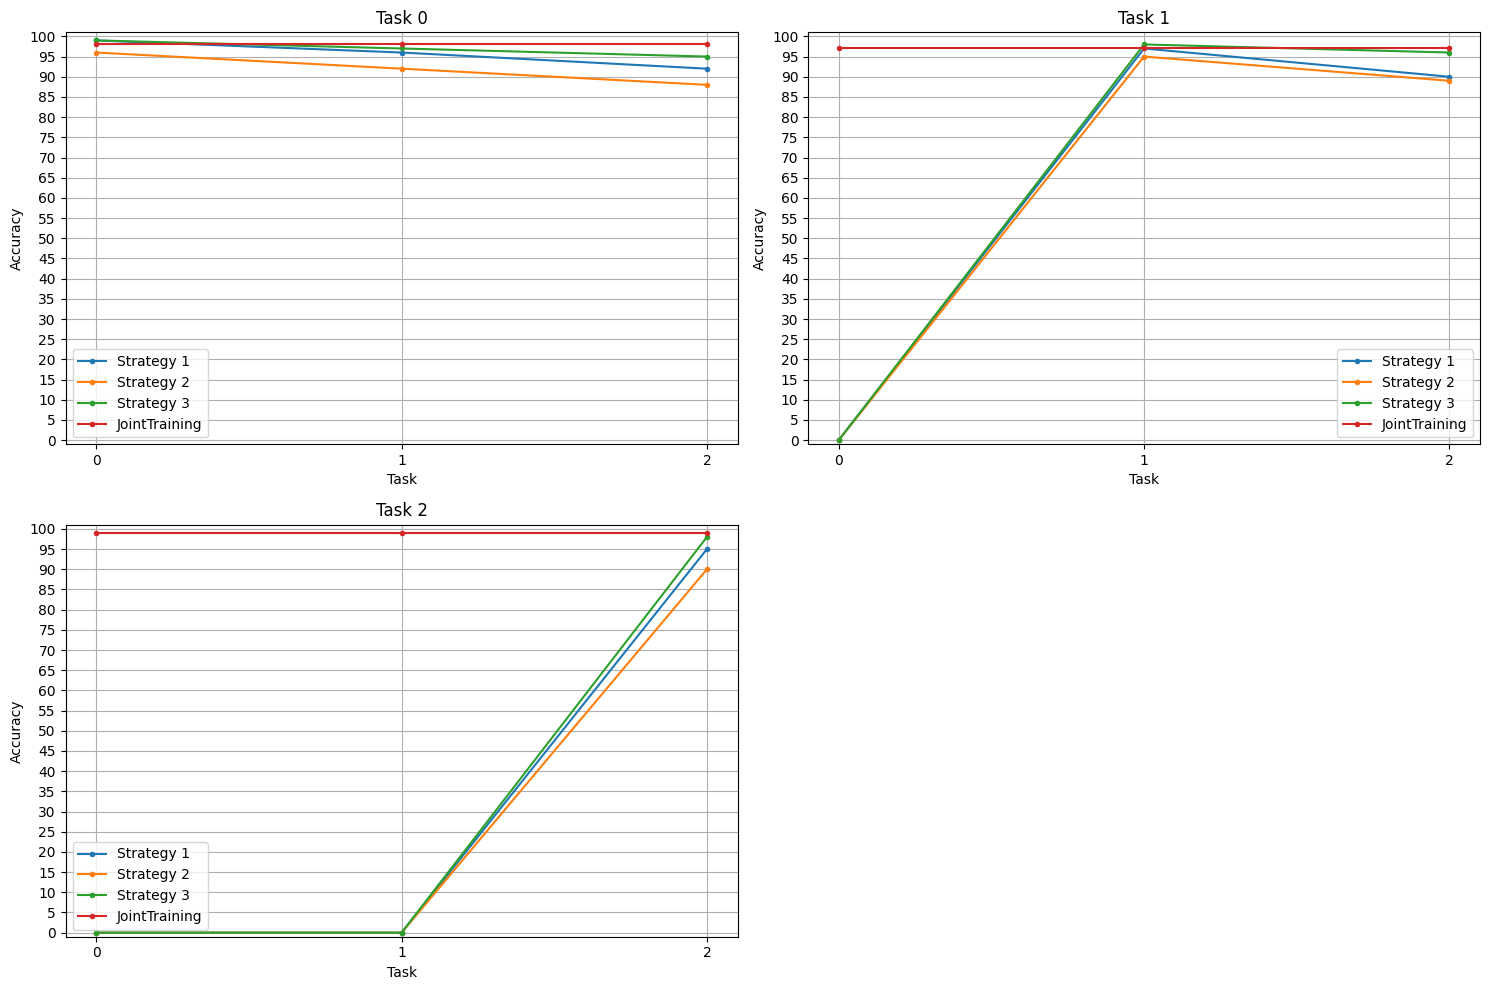

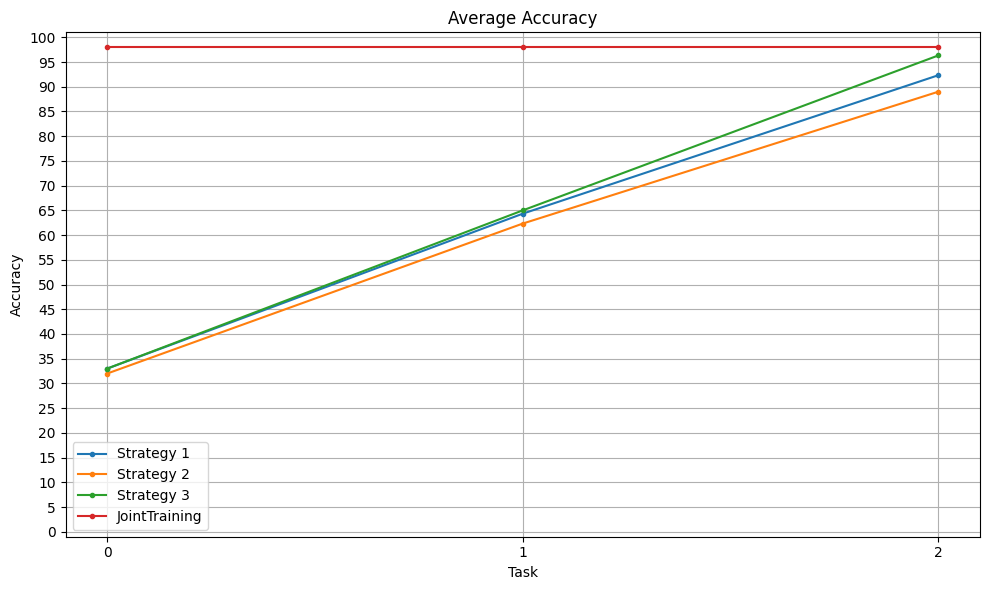

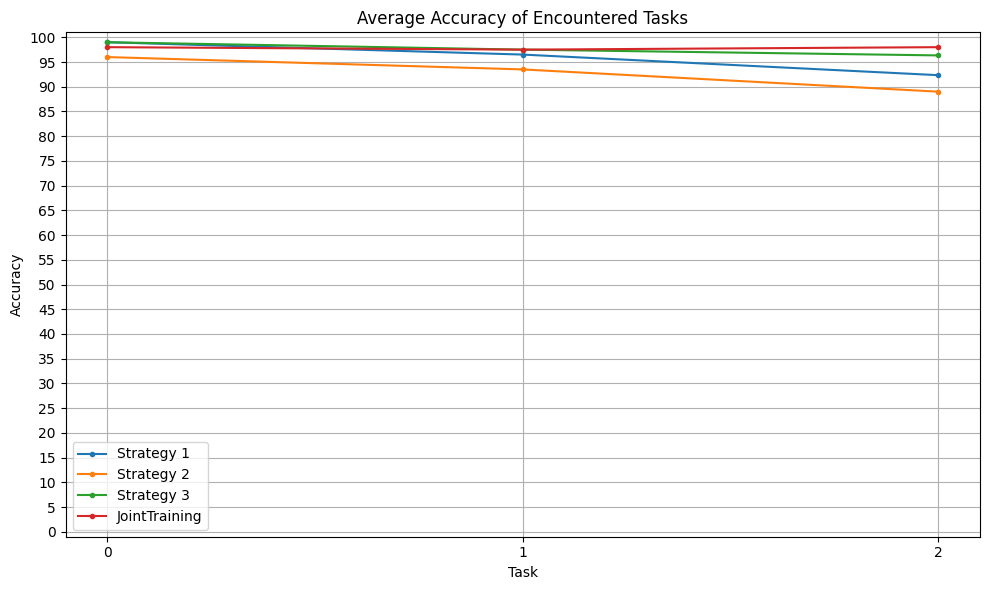

In [32]:
# Example usage:
strategy_dict = {
    "Strategy 1": {
        0: [99, 96, 92],
        1: [0, 97, 90],
        2: [0, 0, 95],
        # Add more tasks as needed...
    },
    "Strategy 2": {
        0: [96, 92, 88],
        1: [0, 95, 89],
        2: [0, 0, 90],
        # Add more tasks as needed...
    },
    "Strategy 3": {
        0: [99, 97, 95],
        1: [0, 98, 96],
        2: [0, 0, 98],
        # Add more tasks as needed...
    },
    "JointTraining": {
        0: [98],
        1: [97],
        2: [99],
    },
}
plotter = TaskAccuracyPlotter()

fig = None
for key, value in strategy_dict.items():
    print(f"Strategy: {key}, Tasks: {list(value.keys())}")
    print(f"Task Accuracy: {value}")
    _ = plotter.plot_task_accuracy(value, label=key, plot_task_acc=True, plot_avg_acc=True, plot_encountered_avg=True)

plotter.show_figures()